<a href="https://colab.research.google.com/github/Nishilhmodi/Codsoft-Internship/blob/main/Task_1_Titanic_SurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **TITANIC SURVIVAL PREDICTION**
---
---

Importing Required libraries...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

Importing Required dataset

In [ ]:
dataset = pd.read_csv("/content/T_Dataset.csv")

**Exploratory Data Analytics**

---




In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(dataset['Sex'])
dataset['sex'] = labels
dataset.drop(['Sex'], axis=1, inplace=True)
#male=1,female=0

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  sex          891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Dropping the unnecessary columns

In [ ]:
dataset.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [ ]:
dataset.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,sex
Survived,,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887,0.852459
1,1.950292,28.549778,0.473684,0.464912,48.395408,0.318713


In [ ]:
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Imbalanced data converted to the Balanced data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(dataset.drop('Survived', axis=1), dataset['Survived'])
print(X_resampled.shape, y_resampled.shape)
print(y_resampled.value_counts())

(684, 6) (684,)
Survived
0    342
1    342
Name: count, dtype: int64


**Data Visualizations**

---



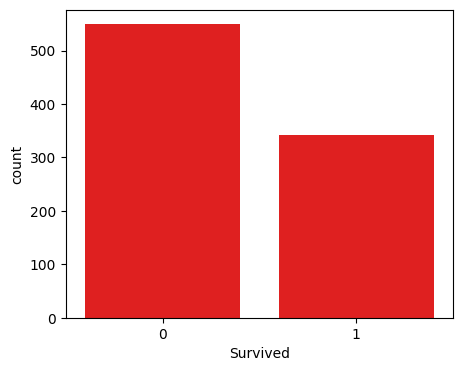

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', data=dataset, color='red')
plt.show()

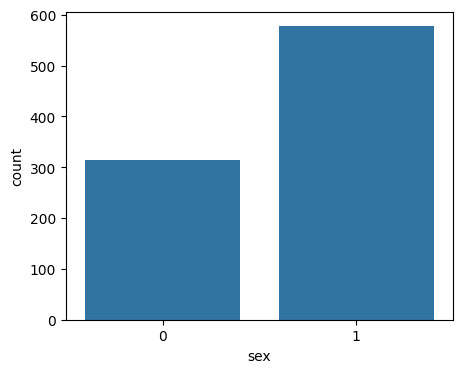

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='sex', data=dataset)
plt.show()

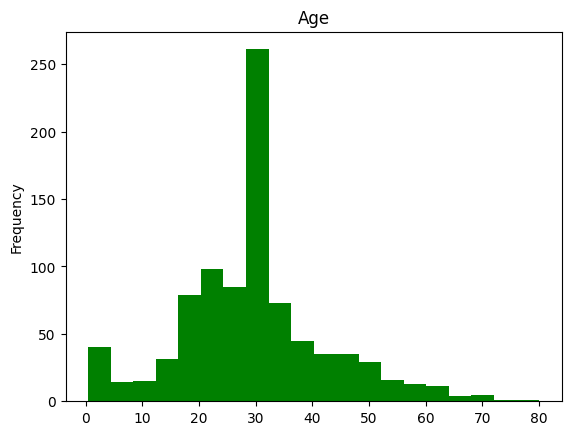

In [ ]:
dataset['Age'].plot(kind='hist', bins=20, title='Age', color='green')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

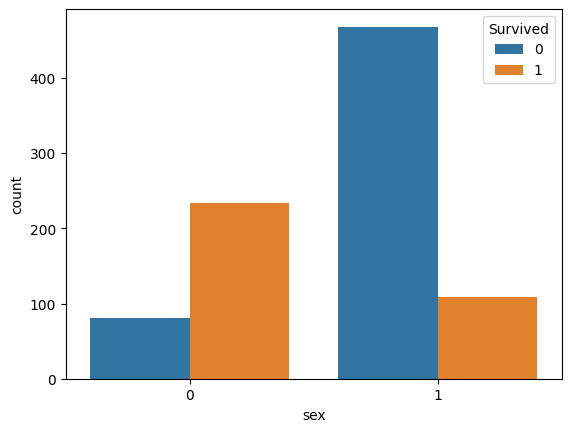

In [ ]:
sns.countplot(x=dataset['sex'], hue=dataset['Survived'])

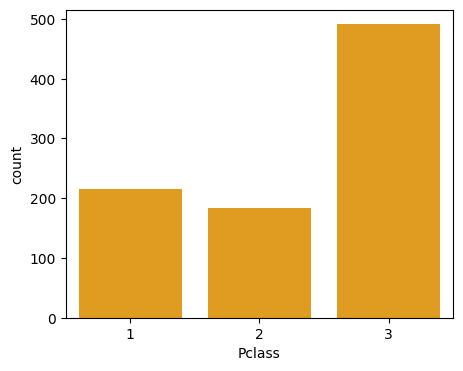

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Pclass', data=dataset, color='orange')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

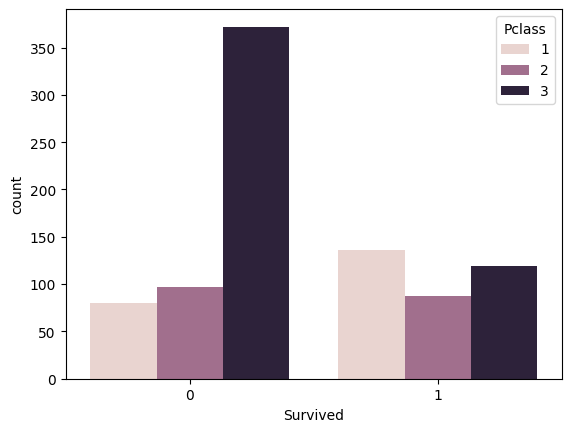

In [ ]:
sns.countplot(x=dataset['Survived'], hue=dataset['Pclass'])

**Appling Different Models on Dataset**

---



Deviding the data into the independent and dependent data.

In [ ]:
x = dataset[['Pclass', 'sex']]
y = dataset['Survived']
print(x)
print(y)

     Pclass  sex
0         3    1
1         1    0
2         3    0
3         1    0
4         3    1
..      ...  ...
886       2    1
887       1    0
888       3    0
889       1    1
890       3    1

[891 rows x 2 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
df_KN={
    'n_neighbors':[i for i in range(1,10)],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
grid_tree=GridSearchCV(KNeighborsClassifier(),df_KN,cv=5,return_train_score=True)
grid_tree.fit(x_train,y_train)
print(grid_tree.best_params_)
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=5,weights='uniform')
knn.fit(x_train, y_train)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


KNeighborsClassifier()

In [ ]:
predictions=knn.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

78.79213483146067
----------------------------------


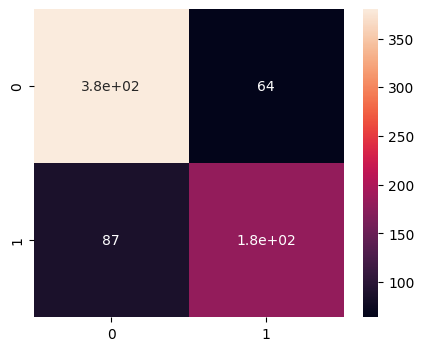

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac=accuracy_score(y_test,predictions)
print(ac*100)
print("----------------------------------")
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_tree={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10),
    'min_samples_split':range(2,10),

}
grid_tree=GridSearchCV(DecisionTreeClassifier(),df_tree,cv=5,return_train_score=True)
grid_tree.fit(x_train,y_train)
print(grid_tree.best_params_)
tree=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=2)
tree.fit(x_train,y_train)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=2)

In [ ]:
predictions=tree.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

78.79213483146067
----------------------------------


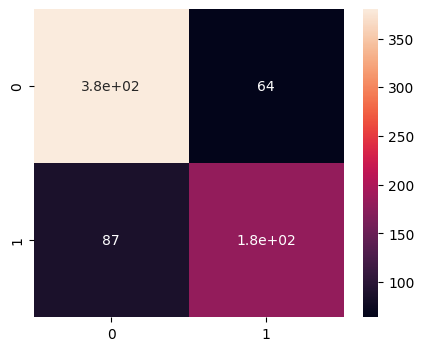

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac=accuracy_score(y_test,predictions)
print(ac*100)
print("----------------------------------")
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.svm import SVC
df_svc={
    'kernel':['linear','rbf','poly'],
    'C':[i for i in range(1,10)],
    'gamma':['scale','auto']
}
grid_svc=GridSearchCV(SVC(),df_svc,cv=5,return_train_score=True)
grid_svc.fit(x_train,y_train)
print(grid_svc.best_params_)
svm=SVC(C=6,gamma='scale',kernel='linear')
svm.fit(x_train,y_train)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=6, kernel='linear')

In [ ]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

78.79213483146067
----------------------------------


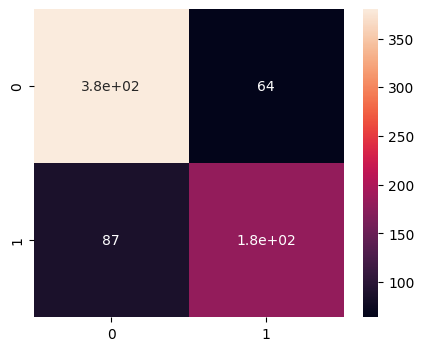

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac=accuracy_score(y_test,predictions)
print(ac*100)
print("----------------------------------")
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('knn',knn),('tree',tree),('svm',svm)],voting='hard')
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier(max_depth=2)),
                             ('svm', SVC(C=0.1, kernel='linear'))])

In [ ]:
predictions=voting_clf.predict(x_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

78.79213483146067
----------------------------------


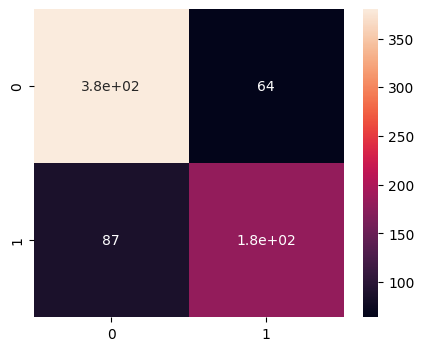

In [ ]:
ac=accuracy_score(y_test,predictions)
print(ac*100)
print("----------------------------------")
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.show()
